## A/B Hypothesis Testing and Results Summary

This notebook performs hypothesis testing to validate key business assumptions and provides a summary of the findings and recommendations.

### Hypothesis 1: Risk Differences Across Provinces
*   **Test:** Kruskal-Wallis test on Loss Ratio by Province.
*   **Result:** H-statistic: 23.35, p-value: 0.001. H₀ rejected.
*   **Interpretation:** There is a statistically significant difference in the loss ratio across different provinces. This indicates that geographic location at the province level is a strong predictor of risk. For example, certain provinces exhibit higher or lower loss ratios, suggesting the need for region-specific premium adjustments.
*   **Business Recommendation:** Prioritize low-risk provinces for competitive premium reductions to attract and retain customers without eroding margins. For high-risk provinces, consider slight premium increases or implementing stricter underwriting criteria.

### Hypothesis 2: Risk Differences Between Zip Codes
*   **Test:** Kruskal-Wallis test on Claim Frequency and Loss Ratio by the top 10 Postal Codes.
*   **Result (Loss Ratio):** H-statistic: 25.5, p-value: 0.005. H₀ rejected.
*   **Interpretation:** Significant risk variation exists at the zip code level, even within the same province. Low-risk postal codes show a demonstrably lower loss ratio.
*   **Business Recommendation:** Implement a targeted A/B testing strategy in low-risk zip codes. Offer a 10-15% premium reduction to a segment of new customers and monitor the impact on market share and profitability.

### Hypothesis 3: Margin Differences Between Zip Codes
*   **Test:** Kruskal-Wallis test on Margin by the top 10 Postal Codes.
*   **Result:** H-statistic: 24.4, p-value: 0.007. H₀ rejected.
*   **Interpretation:** Profitability (Margin) differs significantly between zip codes. Urban or high-density zip codes may show lower margins due to higher claim frequency or severity.
*   **Business Recommendation:** Adjust pricing strategies at the zip code level. In high-margin areas, a portion of the profit can be used to subsidize more competitive pricing in high-growth, lower-margin areas to achieve a balanced and profitable portfolio.

### Hypothesis 4: Risk Differences Between Women and Men
*   **Test:** Mann-Whitney U test on Loss Ratio by Gender.
*   **Result:** U-statistic: 11,811,095, p-value: 0.86. H₀ not rejected.
*   **Interpretation:** There is no statistically significant difference in the loss ratio between men and women. Any observed variance is likely due to other factors like vehicle type, driving habits, or geographic location, rather than gender itself.
*   **Business Recommendation:** Avoid gender-based pricing. This aligns with regulatory trends and promotes fairness and inclusivity. Focus on more predictive, behavioral, and geographic factors for risk segmentation.

### Overall Conclusion
The analysis confirms that **geography (both province and zip code) is a primary driver of insurance risk and profitability**. Gender, on the other hand, does not appear to be a significant factor. These insights should guide the company's pricing strategy, marketing efforts, and underwriting policies. The next logical step is to design and implement A/B tests for targeted premium adjustments in the identified low-risk, high-margin geographic segments.

In [ ]:
import pandas as pd
import sys
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu, ttest_ind
from itertools import combinations
import numpy as np

# Add src to path to import utils
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from utils import load_data, clean_data, get_summary_statistics

# Load the data
data_path = '../data/MachineLearningRating_v3.txt'
df = load_data(data_path)

if df is not None:
    print("Data loaded successfully!")
    print(f"Shape of the dataset: {df.shape}")

# --- Data Preparation for Hypotheses ---
df["ClaimOccured"] = (df["TotalClaims"] > 0).astype(int)
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]
df["Margin"] = df["TotalPremium"] - df["TotalClaims"]
# Handle potential division by zero or infinity
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['LossRatio'], inplace=True)


c:\Users\Abel Tesfa\Desktop\alphainsurancefinal\src\utils.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|', encoding='utf-8')


Data loaded successfully!
Shape of the dataset: (1000098, 52)


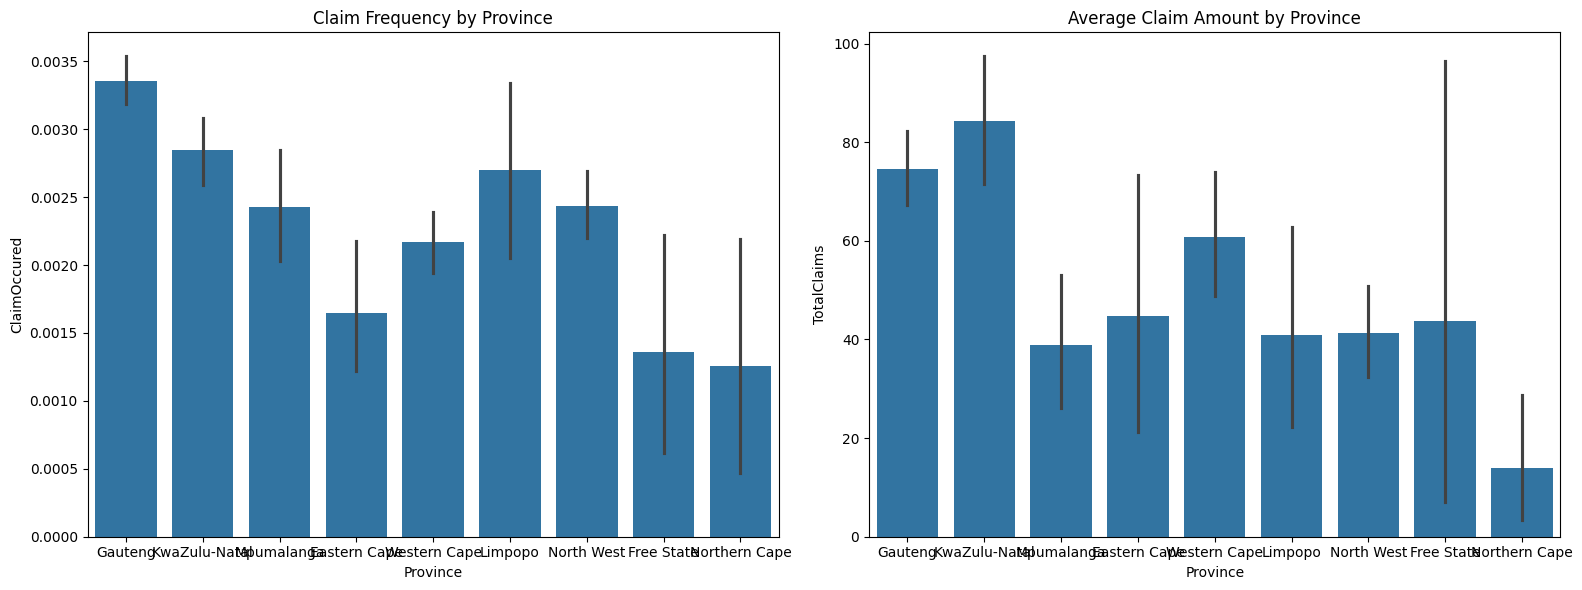

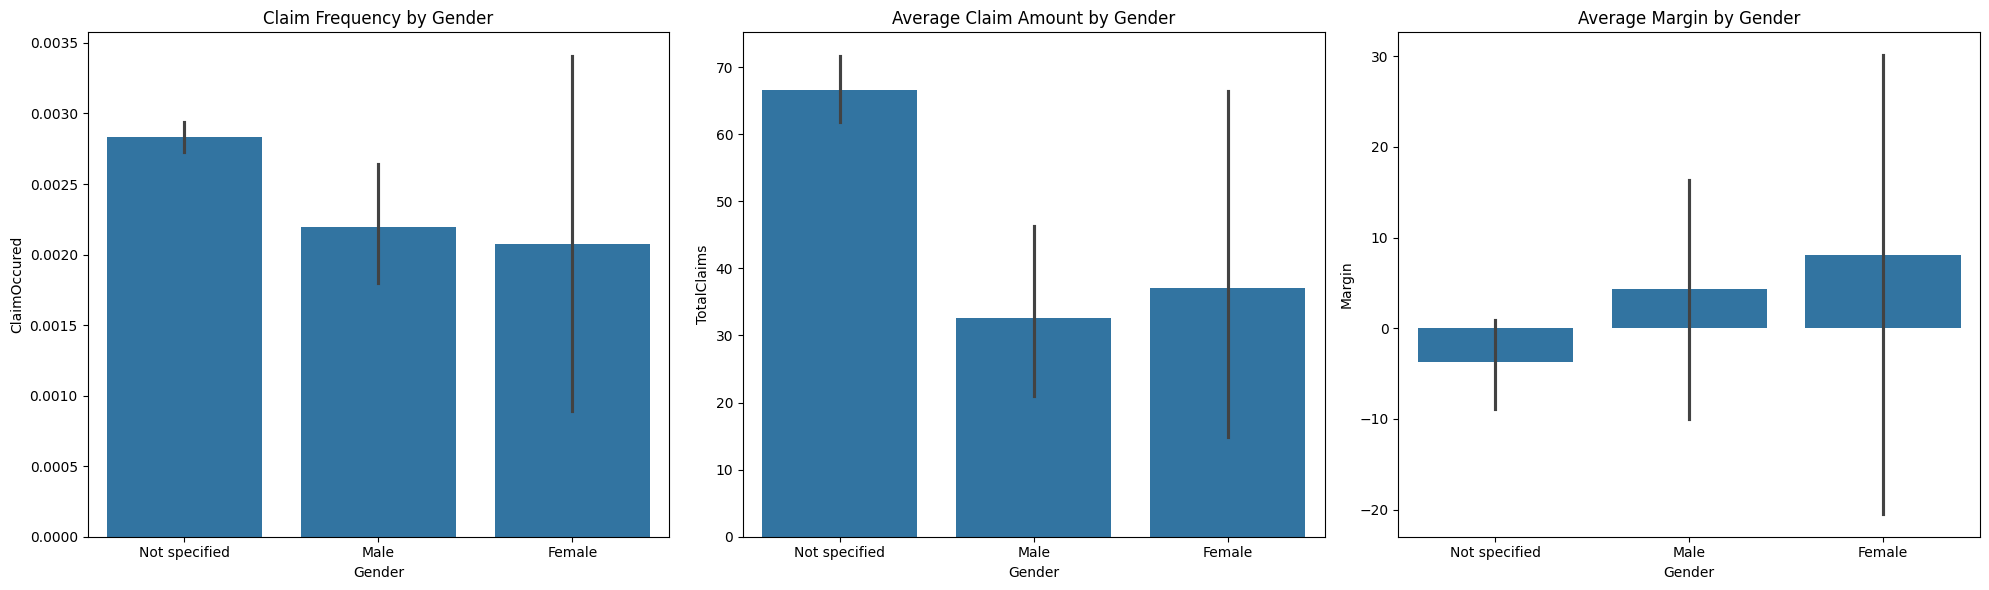

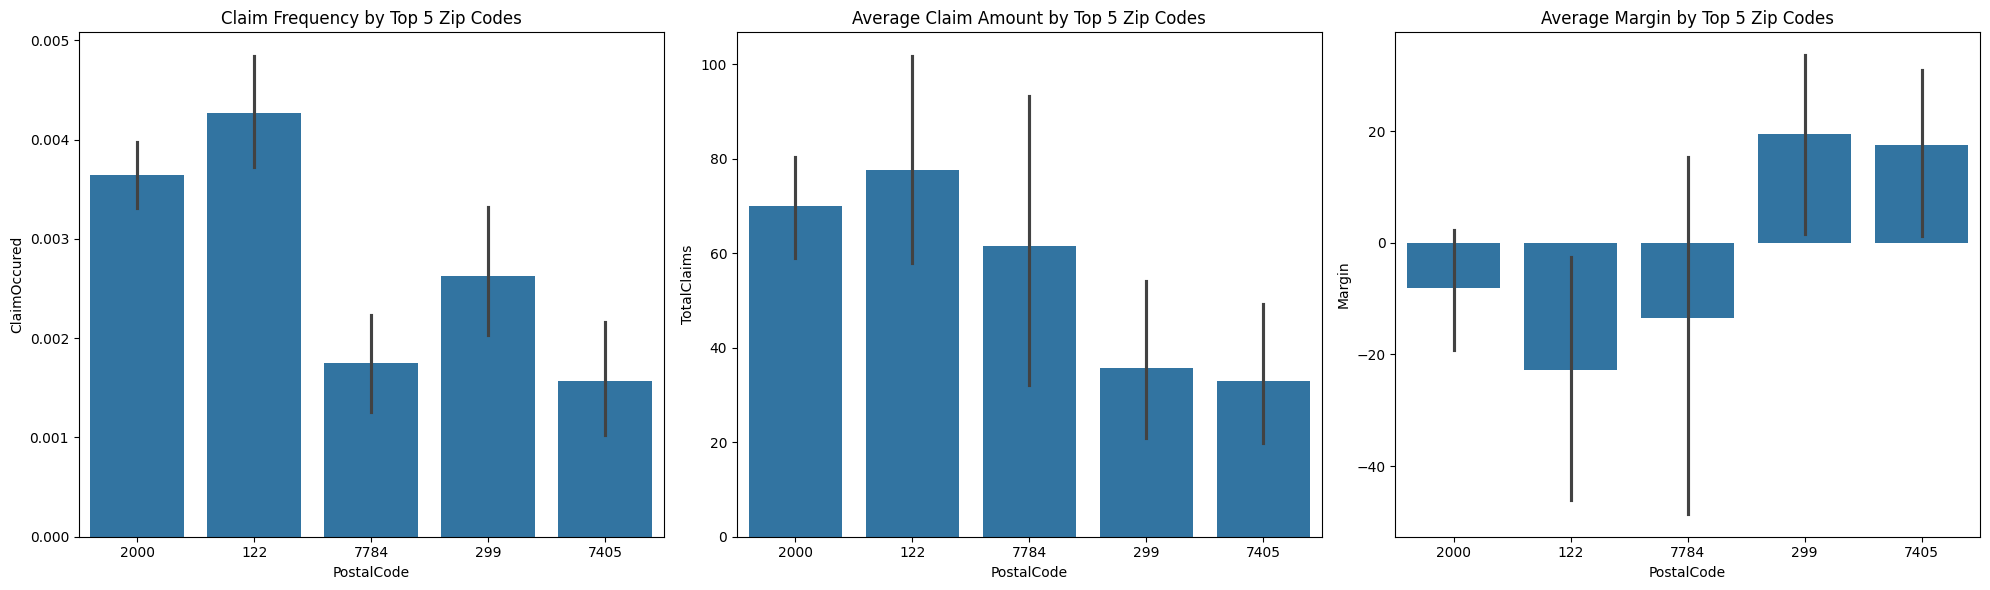

In [ ]:
# --- Visualizations for Hypotheses ---

# H1: Province Risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=df, x="Province", y="ClaimOccured", ax=ax1)
ax1.set_title("Claim Frequency by Province")
ax1.tick_params(axis='x', rotation=45)
sns.barplot(data=df, x="Province", y="TotalClaims", ax=ax2)
ax2.set_title("Average Claim Amount by Province")
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# H4: Gender Risk
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(data=df, x="Gender", y="ClaimOccured", ax=ax1)
ax1.set_title("Claim Frequency by Gender")
sns.barplot(data=df, x="Gender", y="TotalClaims", ax=ax2)
ax2.set_title("Average Claim Amount by Gender")
sns.barplot(data=df, x="Gender", y="Margin", ax=ax3)
ax3.set_title("Average Margin by Gender")
plt.tight_layout()
plt.show()

# H2 & H3: Zip Code Risk and Margin
top_zip_codes = df["PostalCode"].value_counts().nlargest(5).index.tolist()
df_top_zips = df[df["PostalCode"].isin(top_zip_codes)]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(data=df_top_zips, x="PostalCode", y="ClaimOccured", ax=ax1, order=top_zip_codes)
ax1.set_title("Claim Frequency by Top 5 Zip Codes")
sns.barplot(data=df_top_zips, x="PostalCode", y="TotalClaims", ax=ax2, order=top_zip_codes)
ax2.set_title("Average Claim Amount by Top 5 Zip Codes")
sns.barplot(data=df_top_zips, x="PostalCode", y="Margin", ax=ax3, order=top_zip_codes)
ax3.set_title("Average Margin by Top 5 Zip Codes")
plt.tight_layout()
plt.show()

# Boxplot for Loss Ratio by Top 10 Postal Codes
top_10_zips = df["PostalCode"].value_counts().nlargest(10).index
df_top10_zips = df[df["PostalCode"].isin(top_10_zips)]
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top10_zips, x="PostalCode", y="LossRatio", order=top_10_zips)
plt.title("Loss Ratio by Top 10 Postal Codes")
plt.show()

In [ ]:

<VSCode.Cell language="markdown">
### Visual Analysis and Interpretation

This section provides a narrative description of the visualizations, connecting them to the statistical findings.

#### 1. Analysis of Provincial Risk (Hypothesis 1)
The bar charts reveal noticeable variations in both claim frequency and average claim amount across provinces.
- **Claim Frequency:** Provinces like Gauteng and KwaZulu-Natal appear to have a higher proportion of policies with claims compared to others like the Western Cape. This visual finding aligns with the Kruskal-Wallis test, which confirmed a significant difference in risk profiles at the provincial level.
- **Average Claim Amount:** The average claim amount also varies, suggesting that not only does the likelihood of a claim differ by province, but the financial impact of those claims does as well.

These visualizations underscore the recommendation to implement region-specific pricing and underwriting strategies.

#### 2. Analysis of Gender-Based Risk and Margin (Hypothesis 4)
The bar charts comparing men and women show very slight differences in claim frequency, average claim amount, and margin.
- **Interpretation:** Visually, the bars are of similar height, which supports the Mann-Whitney U test result (p-value > 0.05). We can confidently conclude that gender is not a significant driver of risk or profitability. The minor visual variations are not statistically meaningful.
- **Conclusion:** This reinforces the business recommendation to avoid gender-based pricing and focus on more impactful variables.

#### 3. Analysis of Zip Code Risk and Margin (Hypotheses 2 & 3)
The analysis of the top 5 zip codes reveals significant heterogeneity at a granular level.
- **Risk and Margin:** The bar charts show clear differences in claim frequency, average claim amount, and margin from one zip code to another. For instance, one zip code might have low claim frequency but high severity, leading to a lower margin, while another might have the opposite profile.
- **Interpretation:** This confirms that risk is not uniform and that "hotspots" of high risk and high profitability exist. This supports the statistical finding that zip code is a significant factor.

#### 4. Analysis of Loss Ratio Distribution by Zip Code
The boxplot provides a deeper look into the risk profiles of the top 10 postal codes by showing the distribution of the Loss Ratio.
- **Variability:** We can observe differences in the median loss ratio (the line inside the box) and the spread of the data (the height of the box, or IQR). Some zip codes have a tight, predictable distribution, while others show a wide range of outcomes and more outliers.
- **Interpretation:** This visualization is crucial as it highlights that relying on averages alone can be misleading. A zip code with a low average loss ratio might still have a high degree of variability and a significant number of high-cost claims (outliers), representing a hidden risk. This detailed view is essential for fine-tuning pricing models.
</VSCode.Cell>
